In [20]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
import os
import pandas as pd
%matplotlib inline

print("Checking files in data location ...")
drop_dir = '/Users/Gabriel/Dropbox/Research/ASPIDE/Datasets/ECI Chaos/Distributed Phase 1/processed/distributed'
print(check_output(["ls", drop_dir]).decode("utf8"))

df_anomaly = pd.read_csv(os.path.join(drop_dir,"df_clean_distributed.csv"))


Checking files in data location ...
df_anomaly_overlap_distributed.csv
df_anomaly_single_distributed.csv
df_clean_distributed.csv



In [21]:
df_anomaly.columns

Index(['node_arp_entries_10.251.0.105:9100',
       'node_arp_entries_10.251.0.114:9100',
       'node_arp_entries_10.251.0.192:9100',
       'node_arp_entries_10.251.0.25:9100',
       'node_boot_time_seconds_10.251.0.105:9100',
       'node_boot_time_seconds_10.251.0.114:9100',
       'node_boot_time_seconds_10.251.0.192:9100',
       'node_boot_time_seconds_10.251.0.25:9100',
       'node_context_switches_total_10.251.0.105:9100',
       'node_context_switches_total_10.251.0.114:9100',
       ...
       'target_cpu_2', 'target_mem_2', 'target_copy_2', 'target_dummy_2',
       'target_ddot_2', 'target_cpu_3', 'target_mem_3', 'target_copy_3',
       'target_dummy_3', 'target_ddot_3'],
      dtype='object', length=793)

In [22]:
print(df_anomaly.columns.values)

['node_arp_entries_10.251.0.105:9100' 'node_arp_entries_10.251.0.114:9100'
 'node_arp_entries_10.251.0.192:9100' 'node_arp_entries_10.251.0.25:9100'
 'node_boot_time_seconds_10.251.0.105:9100'
 'node_boot_time_seconds_10.251.0.114:9100'
 'node_boot_time_seconds_10.251.0.192:9100'
 'node_boot_time_seconds_10.251.0.25:9100'
 'node_context_switches_total_10.251.0.105:9100'
 'node_context_switches_total_10.251.0.114:9100'
 'node_context_switches_total_10.251.0.192:9100'
 'node_context_switches_total_10.251.0.25:9100'
 'node_cpu_guest_seconds_total_10.251.0.105:9100'
 'node_cpu_guest_seconds_total_10.251.0.114:9100'
 'node_cpu_guest_seconds_total_10.251.0.192:9100'
 'node_cpu_guest_seconds_total_10.251.0.25:9100'
 'node_cpu_seconds_total_10.251.0.105:9100'
 'node_cpu_seconds_total_10.251.0.114:9100'
 'node_cpu_seconds_total_10.251.0.192:9100'
 'node_cpu_seconds_total_10.251.0.25:9100'
 'node_disk_io_now_10.251.0.105:9100' 'node_disk_io_now_10.251.0.114:9100'
 'node_disk_io_now_10.251.0.192:

In [23]:
col_names_plt = list(df_anomaly.columns.values)
new_col_filter = []
for col in col_names_plt:
    if '*_10.251.0.144:9100' in col:
        new_col_filter.append(col)
    if 'time' == col:
        new_col_filter.append(col)
    #
print(new_col_filter)

['time']


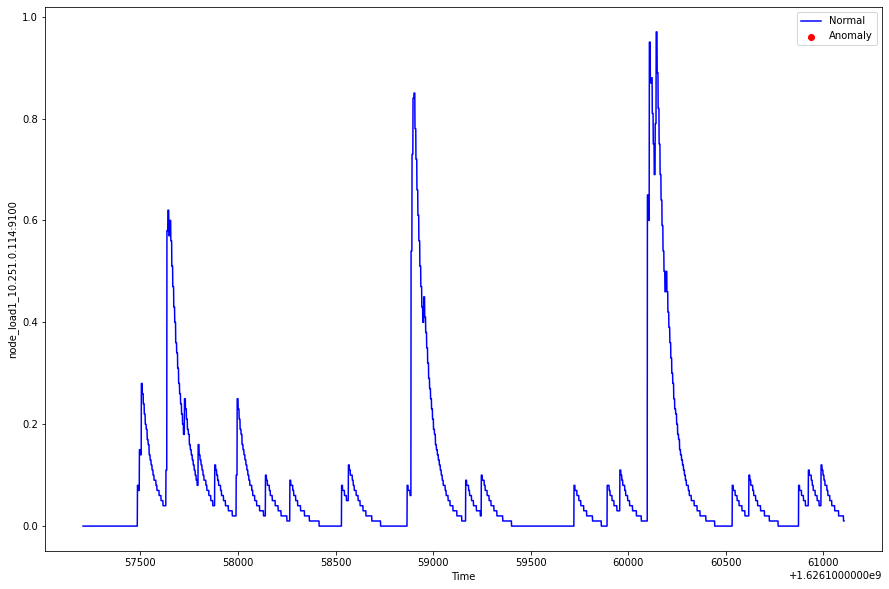

In [24]:

fig, ax = plt.subplots(figsize=(15,10))
a = df_anomaly.loc[df_anomaly['target_cpu_master'] == 1, ['time', "node_load1_10.251.0.114:9100"]] #anomaly
ax.plot(df_anomaly['time'], df_anomaly['node_load1_10.251.0.114:9100'], color='blue', label='Normal')
ax.scatter(a['time'],a["node_load1_10.251.0.114:9100"], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('node_load1_10.251.0.114:9100')
plt.legend()
plt.show();

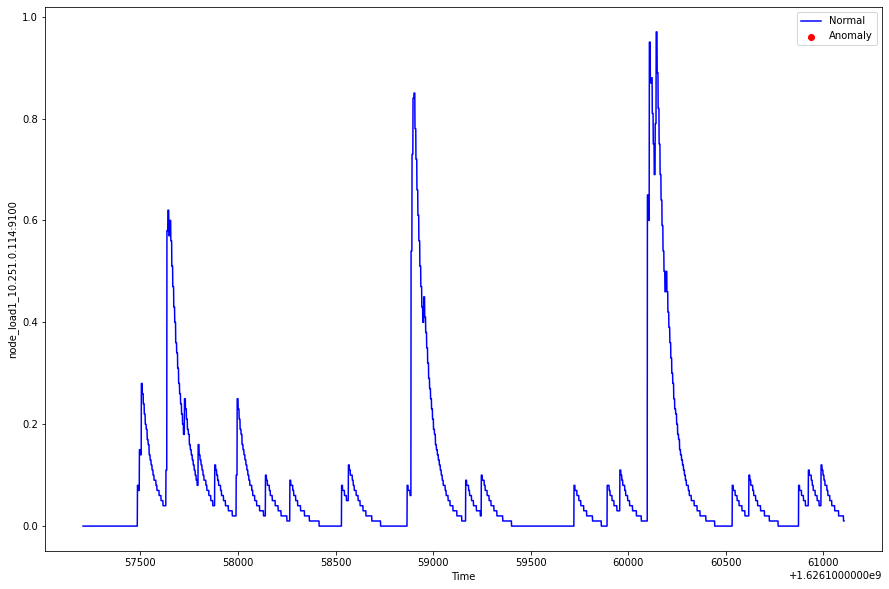

In [25]:
feature = "node_load1_10.251.0.114:9100"
anomaly_col = 'target_mem_1'
fig, ax = plt.subplots(figsize=(15,10))
a = df_anomaly.loc[df_anomaly[anomaly_col] == 1, ['time', feature]] #anomaly
ax.plot(df_anomaly['time'], df_anomaly[feature], color='blue', label='Normal')
ax.scatter(a['time'],a[feature], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel(feature)
plt.legend()
plt.show();

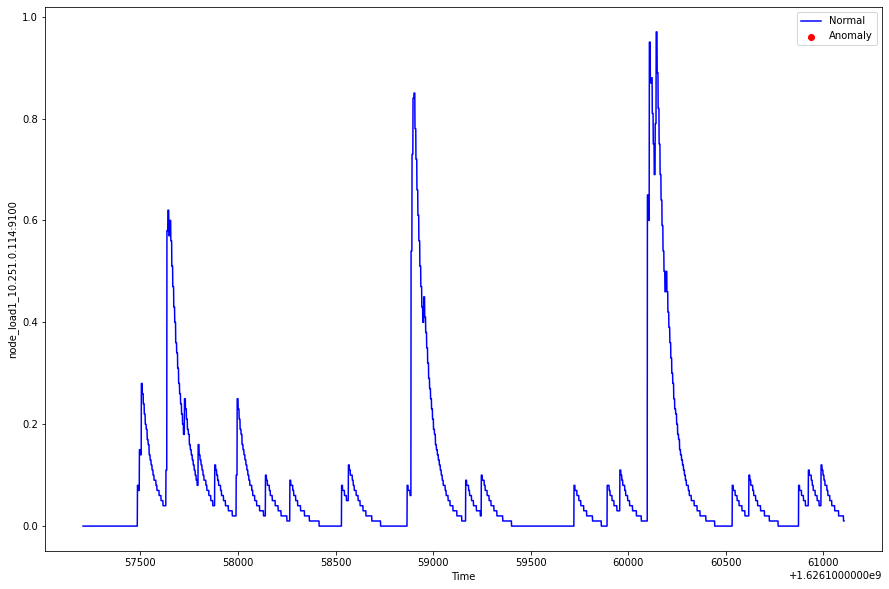

In [26]:
feature = "node_load1_10.251.0.114:9100"
anomaly_col = 'target_cpu_3'
fig, ax = plt.subplots(figsize=(15,10))
a = df_anomaly.loc[df_anomaly[anomaly_col] == 1, ['time', feature]] #anomaly
ax.plot(df_anomaly['time'], df_anomaly[feature], color='blue', label='Normal')
ax.scatter(a['time'],a[feature], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel(feature)
plt.legend()
plt.show();

In [27]:
df_anomaly.columns

Index(['node_arp_entries_10.251.0.105:9100',
       'node_arp_entries_10.251.0.114:9100',
       'node_arp_entries_10.251.0.192:9100',
       'node_arp_entries_10.251.0.25:9100',
       'node_boot_time_seconds_10.251.0.105:9100',
       'node_boot_time_seconds_10.251.0.114:9100',
       'node_boot_time_seconds_10.251.0.192:9100',
       'node_boot_time_seconds_10.251.0.25:9100',
       'node_context_switches_total_10.251.0.105:9100',
       'node_context_switches_total_10.251.0.114:9100',
       ...
       'target_cpu_2', 'target_mem_2', 'target_copy_2', 'target_dummy_2',
       'target_ddot_2', 'target_cpu_3', 'target_mem_3', 'target_copy_3',
       'target_dummy_3', 'target_ddot_3'],
      dtype='object', length=793)

In [28]:
target_cpu_master  = df_anomaly.target_cpu_master
target_mem_master = df_anomaly.target_mem_master
target_copy_master = df_anomaly.target_copy_master
target_dummy_master = df_anomaly.target_dummy_master
target_ddot_master = df_anomaly.target_ddot_master
time = df_anomaly.time
# target_ddot_master.value_counts()
# target_mem_master.value_counts()
# target_copy_master.value_counts()
# target_cpu_master.value_counts()

In [29]:
# For single node filtering
node_wild_card = "10.251.0.114:9100"

filtr_list = []
mask = df_anomaly.columns.str.contains(node_wild_card)
filtr_list.extend(list(df_anomaly.loc[:,mask].columns.values))
df_anomaly = df_anomaly[filtr_list]
df_anomaly


,node_arp_entries_10.251.0.114:9100,node_boot_time_seconds_10.251.0.114:9100,node_context_switches_total_10.251.0.114:9100,node_cpu_guest_seconds_total_10.251.0.114:9100,node_cpu_seconds_total_10.251.0.114:9100,node_disk_io_now_10.251.0.114:9100,node_disk_io_time_seconds_total_10.251.0.114:9100,node_disk_io_time_weighted_seconds_total_10.251.0.114:9100,node_disk_read_bytes_total_10.251.0.114:9100,node_disk_read_time_seconds_total_10.251.0.114:9100,...,node_timex_tai_offset_seconds_10.251.0.114:9100,node_timex_tick_seconds_10.251.0.114:9100,node_uname_info_10.251.0.114:9100,node_vmstat_oom_kill_10.251.0.114:9100,node_vmstat_pgfault_10.251.0.114:9100,node_vmstat_pgmajfault_10.251.0.114:9100,node_vmstat_pgpgin_10.251.0.114:9100,node_vmstat_pgpgout_10.251.0.114:9100,node_vmstat_pswpin_10.251.0.114:9100,node_vmstat_pswpout_10.251.0.114:9100
0,6,1620821678,3020362774,0,57142.56,0,25995.032,176244.164,1283755008,326.720,...,0,0.01,1,0,574596425,3626,1253676,572774847,0,0
1,6,1620821678,3020363667,0,57142.57,0,25995.032,176244.164,1283755008,326.720,...,0,0.01,1,0,574597056,3626,1253676,572774847,0,0
2,6,1620821678,3020364242,0,57142.57,0,25995.032,176244.164,1283755008,326.720,...,0,0.01,1,0,574597056,3626,1253676,572774847,0,0
3,6,1620821678,3020364856,0,57142.58,0,25995.032,176244.164,1283755008,326.720,...,0,0.01,1,0,574597056,3626,1253676,572774847,0,0
4,6,1620821678,3020365286,0,57142.59,0,25995.032,176244.164,1283755008,326.720,...,0,0.01,1,0,574597057,3626,1253676,572774847,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,6,1620821678,3022681458,0,57182.84,0,26011.956,176350.140,1283759104,326.744,...,0,0.01,1,0,574943714,3626,1253680,573148899,0,0
3896,6,1620821678,3022682101,0,57182.84,0,26011.956,176350.140,1283759104,326.744,...,0,0.01,1,0,574943714,3626,1253680,573148899,0,0
3897,6,1620821678,3022682587,0,57182.84,0,26011.956,176350.140,1283759104,326.744,...,0,0.01,1,0,574943715,3626,1253680,573148899,0,0
3898,6,1620821678,3022682978,0,57182.85,0,26011.956,176350.140,1283759104,326.744,...,0,0.01,1,0,574943715,3626,1253680,573148899,0,0


In [30]:

df_anomaly['target_cpu_master'] = target_cpu_master
df_anomaly['target_mem_master'] = df_anomaly.target_cpu_master
df_anomaly['target_copy_master'] = target_copy_master
df_anomaly['target_dummy_master'] = target_dummy_master
df_anomaly['target_ddot_master'] = target_ddot_master
df_anomaly['time'] = time

In [31]:
df_anomaly

,node_arp_entries_10.251.0.114:9100,node_boot_time_seconds_10.251.0.114:9100,node_context_switches_total_10.251.0.114:9100,node_cpu_guest_seconds_total_10.251.0.114:9100,node_cpu_seconds_total_10.251.0.114:9100,node_disk_io_now_10.251.0.114:9100,node_disk_io_time_seconds_total_10.251.0.114:9100,node_disk_io_time_weighted_seconds_total_10.251.0.114:9100,node_disk_read_bytes_total_10.251.0.114:9100,node_disk_read_time_seconds_total_10.251.0.114:9100,...,node_vmstat_pgpgin_10.251.0.114:9100,node_vmstat_pgpgout_10.251.0.114:9100,node_vmstat_pswpin_10.251.0.114:9100,node_vmstat_pswpout_10.251.0.114:9100,target_cpu_master,target_mem_master,target_copy_master,target_dummy_master,target_ddot_master,time
0,6,1620821678,3020362774,0,57142.56,0,25995.032,176244.164,1283755008,326.720,...,1253676,572774847,0,0,0,0,0,0,0,1.626157e+09
1,6,1620821678,3020363667,0,57142.57,0,25995.032,176244.164,1283755008,326.720,...,1253676,572774847,0,0,0,0,0,0,0,1.626157e+09
2,6,1620821678,3020364242,0,57142.57,0,25995.032,176244.164,1283755008,326.720,...,1253676,572774847,0,0,0,0,0,0,0,1.626157e+09
3,6,1620821678,3020364856,0,57142.58,0,25995.032,176244.164,1283755008,326.720,...,1253676,572774847,0,0,0,0,0,0,0,1.626157e+09
4,6,1620821678,3020365286,0,57142.59,0,25995.032,176244.164,1283755008,326.720,...,1253676,572774847,0,0,0,0,0,0,0,1.626157e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,6,1620821678,3022681458,0,57182.84,0,26011.956,176350.140,1283759104,326.744,...,1253680,573148899,0,0,0,0,0,0,0,1.626161e+09
3896,6,1620821678,3022682101,0,57182.84,0,26011.956,176350.140,1283759104,326.744,...,1253680,573148899,0,0,0,0,0,0,0,1.626161e+09
3897,6,1620821678,3022682587,0,57182.84,0,26011.956,176350.140,1283759104,326.744,...,1253680,573148899,0,0,0,0,0,0,0,1.626161e+09
3898,6,1620821678,3022682978,0,57182.85,0,26011.956,176350.140,1283759104,326.744,...,1253680,573148899,0,0,0,0,0,0,0,1.626161e+09


In [32]:
save_dir = '/Users/Gabriel/Dropbox/Research/ASPIDE/Datasets/ECI Chaos/Distributed Phase 1/processed'
df_anomaly.to_csv(os.path.join(save_dir, 'df_anomaly_single_node.csv'))